In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
import joblib
import pandas as pd
import numpy as np
import matplotlib as plt

In [10]:
df=pd.read_csv('Food_Delivery_Times.csv')
df

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68
...,...,...,...,...,...,...,...,...,...
995,107,8.50,Clear,High,Evening,Car,13,3.0,54
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,861,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.0,55


In [11]:

# # Select numerical columns
# numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# # Generate box plots for numerical columns to detect outliers
# plt.figure(figsize=(15, 10))
# for i, col in enumerate(numerical_columns, 1):
#     plt.subplot(2, (len(numerical_columns) + 1) // 2, i)
#     df.boxplot(column=col)
#     plt.title(f'Box Plot of {col}')

# plt.tight_layout()
# plt.show()


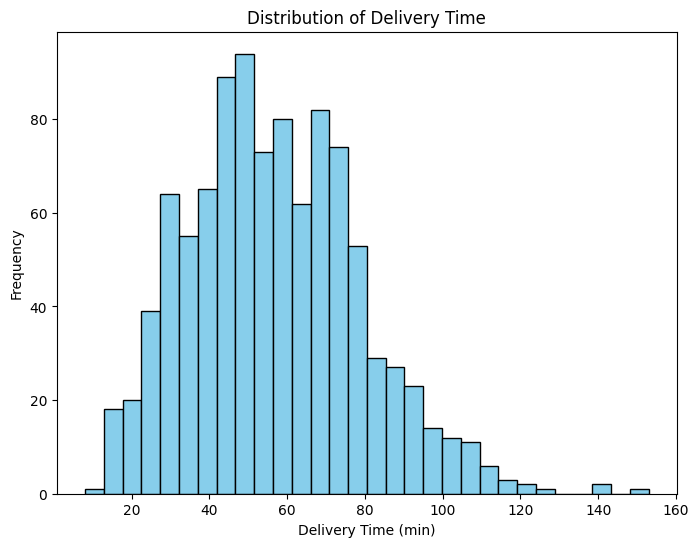

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['Delivery_Time_min'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time (min)')
plt.ylabel('Frequency')
plt.show()


In [13]:
# import seaborn as sns


# plt.figure(figsize=(12, 8))
# sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
# plt.title('Feature Correlation Heatmap')
# plt.show()



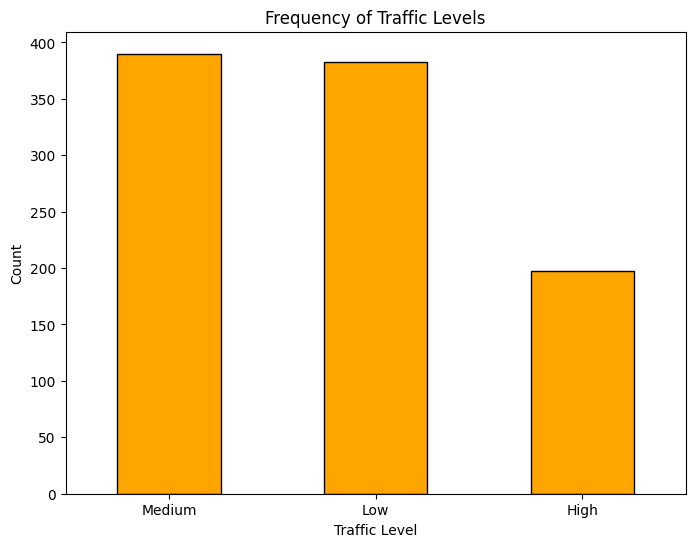

In [14]:
traffic_counts = df['Traffic_Level'].value_counts()

plt.figure(figsize=(8, 6))
traffic_counts.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Frequency of Traffic Levels')
plt.xlabel('Traffic Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


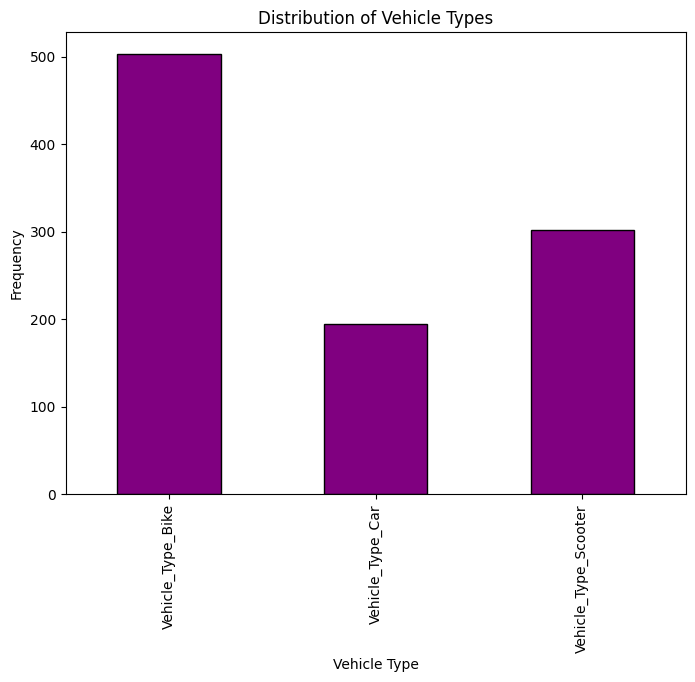

In [15]:
df = pd.get_dummies(df,columns=['Vehicle_Type'])

vehicle_counts = df[['Vehicle_Type_Bike', 'Vehicle_Type_Car', 'Vehicle_Type_Scooter']].sum()

plt.figure(figsize=(8, 6))
vehicle_counts.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Distribution of Vehicle Types')
plt.xlabel('Vehicle Type')
plt.ylabel('Frequency')
plt.show()


In [16]:

df.nunique()

Order_ID                  1000
Distance_km                785
Weather                      5
Traffic_Level                3
Time_of_Day                  4
Preparation_Time_min        25
Courier_Experience_yrs      10
Delivery_Time_min          108
Vehicle_Type_Bike            2
Vehicle_Type_Car             2
Vehicle_Type_Scooter         2
dtype: int64

In [17]:
df.isnull().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
Vehicle_Type_Bike          0
Vehicle_Type_Car           0
Vehicle_Type_Scooter       0
dtype: int64

In [18]:
df = df.drop(['Order_ID'],axis=1)
df = pd.get_dummies(df,columns=['Weather','Traffic_Level','Time_of_Day'])
df['Courier_Experience_yrs'] = df['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].median())
df = df.drop(['Time_of_Day_Night','Time_of_Day_Afternoon','Time_of_Day_Evening','Time_of_Day_Morning'],axis=1)
df


,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Vehicle_Type_Bike,Vehicle_Type_Car,Vehicle_Type_Scooter,Weather_Clear,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_High,Traffic_Level_Low,Traffic_Level_Medium
0,7.93,12,1.0,43,False,False,True,False,False,False,False,True,False,True,False
1,16.42,20,2.0,84,True,False,False,True,False,False,False,False,False,False,True
2,9.52,28,1.0,59,False,False,True,False,True,False,False,False,False,True,False
3,7.44,5,1.0,37,False,False,True,False,False,True,False,False,False,False,True
4,19.03,16,5.0,68,True,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8.50,13,3.0,54,False,True,False,True,False,False,False,False,True,False,False
996,16.28,8,9.0,71,False,False,True,False,False,True,False,False,False,True,False
997,15.62,26,2.0,81,False,False,True,False,False,False,True,False,True,False,False
998,14.17,8,0.0,55,True,False,False,True,False,False,False,False,False,True,False


In [19]:
X = df.drop('Delivery_Time_min', axis=1)
y = df['Delivery_Time_min'].to_numpy()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=70)
X.isnull().sum()

Distance_km               0
Preparation_Time_min      0
Courier_Experience_yrs    0
Vehicle_Type_Bike         0
Vehicle_Type_Car          0
Vehicle_Type_Scooter      0
Weather_Clear             0
Weather_Foggy             0
Weather_Rainy             0
Weather_Snowy             0
Weather_Windy             0
Traffic_Level_High        0
Traffic_Level_Low         0
Traffic_Level_Medium      0
dtype: int64

In [20]:
GBR = GradientBoostingRegressor(
    n_estimators = 500,
    learning_rate = 0.1,
    max_depth = 6,
    min_samples_leaf = 17,
    max_features = 0.3,
    loss = "huber",
    random_state = 4
)

GBR.fit(X_train,y_train)




GradientBoostingRegressor(loss='huber', max_depth=6, max_features=0.3,
                          min_samples_leaf=17, n_estimators=500,
                          random_state=4)

In [21]:
RFR = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

RFR.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [22]:
LM = LinearRegression()

LM.fit(X_train, y_train)

LinearRegression()

In [23]:
DTR = DecisionTreeRegressor()

DTR.fit(X_train,y_train)

DecisionTreeRegressor()

In [24]:
LR = LogisticRegression(solver='saga',max_iter= 2000)
LR.fit(X_train,y_train)

c:\Users\umarr\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=2000, solver='saga')

In [25]:
from sklearn.metrics import r2_score

models = {
    'Linear Regression': LM,
    'Random Forest': RFR,
    'Gradient Boosting': GBR,
    'DecisionTreeRegressor': DTR,
    "LogisticRegression":LR
}

results = {}
def MAE(y_pred,y_test):
    return np.mean(np.abs(y_pred - y_test))

for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    score = model.score(X_train,y_train)
    mae = MAE(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MAE': mae, 'R²': r2, 'Score': score}
    print(f"{name} - MAE: {mae:.2f}, R²: {r2:.2f}, Score : {score: .2f}")

Linear Regression - MAE: 6.30, R²: 0.77, Score :  0.78
Random Forest - MAE: 7.31, R²: 0.73, Score :  0.96
Gradient Boosting - MAE: 7.20, R²: 0.72, Score :  0.91
DecisionTreeRegressor - MAE: 10.66, R²: 0.50, Score :  1.00
LogisticRegression - MAE: 10.43, R²: 0.54, Score :  0.17


c:\Users\umarr\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [26]:
y_pred = GBR.predict(X_test)
def MAE(y_pred,y_test):
    return np.mean(np.abs(y_pred - y_test))

In [27]:
MAE(y_pred,y_test)

np.float64(7.197326711459189)

In [28]:
# from sklearn.model_selection import RandomizedSearchCV

# param_grid = {
#     'n_estimators': [500, 1000, 3000],
#     'max_depth': [4, 6],
#     'min_samples_leaf': [3, 5, 9, 17],
#     'learning_rate': [0.1, 0.05, 0.02, 0.01],
#     'max_features': [1.0, 0.3, 0.1],
#     'loss': ['ls', 'lad', 'huber']
# }


# random_search = RandomizedSearchCV(
#     GBR,          
#     param_distributions=param_grid,  
#     n_iter=100,     
#     n_jobs=1,      
#     verbose=100,    
#     cv=5,          
#     random_state=42 
# )

# random_search.fit(X_train, y_train)

# print(random_search.best_params_)

In [29]:
# from sklearn.model_selection import RandomizedSearchCV

# param_grid = {
#     'n_estimators': [500, 1000, 3000],
# }


# random_search = RandomizedSearchCV(
#     RFR,          
#     param_distributions=param_grid,  
#     n_iter=100,     
#     n_jobs=1,      
#     verbose=100,    
#     cv=5,          
#     random_state=42 
# )

# random_search.fit(X_train, y_train)

# print(random_search.best_params_)

Weather_Windy - 0.11%
Vehicle_Type_Scooter - 0.22%
Weather_Foggy - 0.30%
Vehicle_Type_Car - 0.30%
Vehicle_Type_Bike - 0.35%
Weather_Rainy - 0.51%
Traffic_Level_Medium - 0.72%
Weather_Snowy - 1.70%
Weather_Clear - 1.74%
Traffic_Level_Low - 2.31%
Traffic_Level_High - 2.36%
Courier_Experience_yrs - 2.70%
Preparation_Time_min - 13.79%
Distance_km - 72.90%


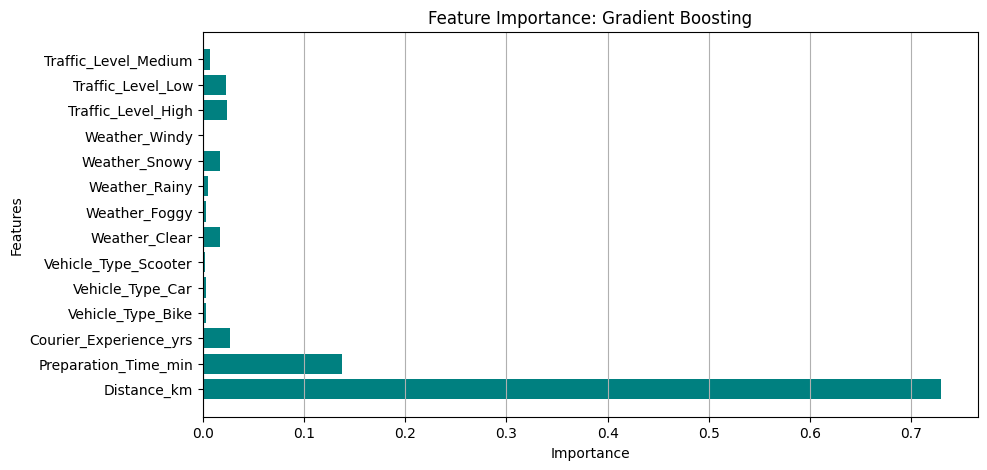

In [30]:
feature_labels = df.drop('Delivery_Time_min', axis=1).columns.values
importance = GBR.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print("{} - {:.2f}%".format (feature_labels[index], (importance[index]*100)))

    # Feature importance for Gradient Boosting

importance = GBR.feature_importances_
plt.figure(figsize=(10, 5))
plt.barh(X_train.columns, importance, color='teal')
plt.title('Feature Importance: Gradient Boosting')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.grid(axis='x')
plt.show()


In [31]:
feature_labels = df.drop('Delivery_Time_min', axis=1).columns.values
importance = RFR.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print("{} - {:.2f}%".format (feature_labels[index], (importance[index]*100)))

Weather_Windy - 0.38%
Traffic_Level_Medium - 0.57%
Vehicle_Type_Scooter - 0.57%
Vehicle_Type_Bike - 0.66%
Vehicle_Type_Car - 0.74%
Weather_Rainy - 0.87%
Weather_Foggy - 1.03%
Weather_Snowy - 1.12%
Weather_Clear - 1.43%
Traffic_Level_High - 1.85%
Traffic_Level_Low - 1.90%
Courier_Experience_yrs - 4.14%
Preparation_Time_min - 15.07%
Distance_km - 69.68%


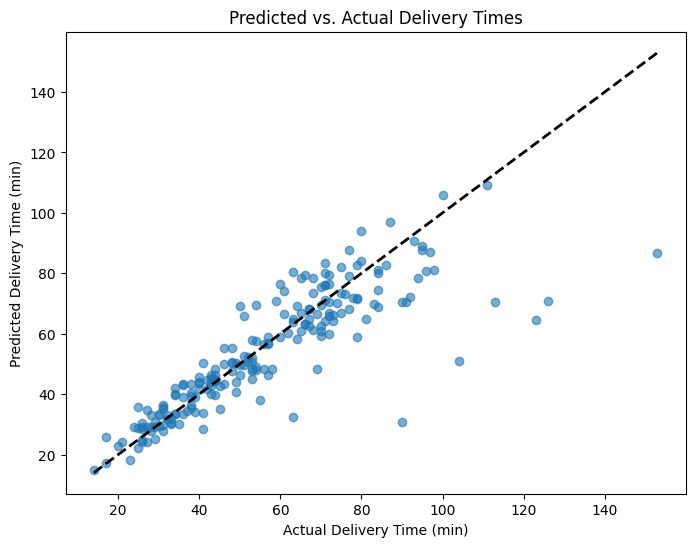

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Predicted vs. Actual Delivery Times')
plt.xlabel('Actual Delivery Time (min)')
plt.ylabel('Predicted Delivery Time (min)')
plt.show()


In [33]:
joblib.dump(GBR, 'trained_Delivery_Time.pkl')

['trained_Delivery_Time.pkl']